https://github.com/AlchemistMartin/quantile_regression/blob/master/multi_quantile_regression.ipynb

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import glorot_uniform
import tensorflow.keras.backend as K

%matplotlib inline

mcycle = pd.read_csv('mcycle',delimiter='\t')

In [3]:
mcycle.times = (mcycle.times - mcycle.times.mean())/mcycle.times.std()
mcycle.accel = (mcycle.accel - mcycle.accel.mean())/mcycle.accel.std()

In [4]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [5]:
def mcycleModel(qs=[0.1, 0.5, 0.9]):
    ipt_layer = Input((1,))
    layer1 = Dense(10, activation='relu', kernel_initializer=glorot_uniform())(ipt_layer)
    layer2 = Dense(10, activation='relu', kernel_initializer=glorot_uniform())(layer1)
    
    out1 = Dense(1, name='out1')(layer2)
    out2 = Dense(1, name='out2')(layer2)
    out3 = Dense(1, name='out3')(layer2)
    
    q1, q2, q3 = qs
    model = Model(inputs=ipt_layer, outputs=[out1, out2, out3])
    model.compile(loss={'out1': lambda y,f: tilted_loss(q1,y,f),
                        'out2': lambda y,f: tilted_loss(q2,y,f),
                        'out3': lambda y,f: tilted_loss(q3,y,f),}, 
                  loss_weights={'out1': 1, 'out2': 1, 'out3': 1},
                 optimizer='adadelta')
    
    return model

In [8]:
model = mcycleModel()
x = mcycle.times.values
y = mcycle.accel.values
model.fit(x=x, y=[y, y, y], epochs=2000, batch_size=32)# verbose=0

Epoch 1/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0571 - out1_loss: 0.3537 - out2_loss: 0.3599 - out3_loss: 0.3435
Epoch 2/2000
3/3 [==============================] - 0s 678us/step - loss: 1.0571 - out1_loss: 0.3537 - out2_loss: 0.3598 - out3_loss: 0.3435
Epoch 3/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0571 - out1_loss: 0.3537 - out2_loss: 0.3598 - out3_loss: 0.3435
Epoch 4/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0571 - out1_loss: 0.3537 - out2_loss: 0.3598 - out3_loss: 0.3435
Epoch 5/2000
3/3 [==============================] - 0s 662us/step - loss: 1.0570 - out1_loss: 0.3537 - out2_loss: 0.3598 - out3_loss: 0.3435
Epoch 6/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0570 - out1_loss: 0.3537 - out2_loss: 0.3598 - out3_loss: 0.3434
Epoch 7/2000
3/3 [==============================] - 0s 655us/step - loss: 1.0570 - out1_loss: 0.3537 - out2_loss: 0.3598 - out3_loss: 0.3434
Epoch 8/2000


3/3 [==============================] - 0s 659us/step - loss: 1.0558 - out1_loss: 0.3535 - out2_loss: 0.3597 - out3_loss: 0.3426
Epoch 59/2000
3/3 [==============================] - 0s 661us/step - loss: 1.0558 - out1_loss: 0.3535 - out2_loss: 0.3597 - out3_loss: 0.3426
Epoch 60/2000
3/3 [==============================] - 0s 674us/step - loss: 1.0558 - out1_loss: 0.3535 - out2_loss: 0.3597 - out3_loss: 0.3426
Epoch 61/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0557 - out1_loss: 0.3535 - out2_loss: 0.3597 - out3_loss: 0.3426
Epoch 62/2000
3/3 [==============================] - 0s 995us/step - loss: 1.0557 - out1_loss: 0.3535 - out2_loss: 0.3597 - out3_loss: 0.3426
Epoch 63/2000
3/3 [==============================] - 0s 991us/step - loss: 1.0557 - out1_loss: 0.3535 - out2_loss: 0.3596 - out3_loss: 0.3425
Epoch 64/2000
3/3 [==============================] - 0s 676us/step - loss: 1.0557 - out1_loss: 0.3535 - out2_loss: 0.3596 - out3_loss: 0.3425
Epoch 65/2000
3/3 [=

3/3 [==============================] - 0s 665us/step - loss: 1.0543 - out1_loss: 0.3533 - out2_loss: 0.3595 - out3_loss: 0.3416
Epoch 116/2000
3/3 [==============================] - 0s 663us/step - loss: 1.0543 - out1_loss: 0.3533 - out2_loss: 0.3595 - out3_loss: 0.3416
Epoch 117/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0543 - out1_loss: 0.3533 - out2_loss: 0.3594 - out3_loss: 0.3416
Epoch 118/2000
3/3 [==============================] - 0s 987us/step - loss: 1.0543 - out1_loss: 0.3533 - out2_loss: 0.3594 - out3_loss: 0.3416
Epoch 119/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0542 - out1_loss: 0.3533 - out2_loss: 0.3594 - out3_loss: 0.3415
Epoch 120/2000
3/3 [==============================] - 0s 655us/step - loss: 1.0542 - out1_loss: 0.3533 - out2_loss: 0.3594 - out3_loss: 0.3415
Epoch 121/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0542 - out1_loss: 0.3533 - out2_loss: 0.3594 - out3_loss: 0.3415
Epoch 122/2000

3/3 [==============================] - 0s 997us/step - loss: 1.0528 - out1_loss: 0.3530 - out2_loss: 0.3592 - out3_loss: 0.3405
Epoch 173/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0527 - out1_loss: 0.3530 - out2_loss: 0.3592 - out3_loss: 0.3405
Epoch 174/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0527 - out1_loss: 0.3530 - out2_loss: 0.3592 - out3_loss: 0.3405
Epoch 175/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0527 - out1_loss: 0.3530 - out2_loss: 0.3592 - out3_loss: 0.3405
Epoch 176/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0527 - out1_loss: 0.3530 - out2_loss: 0.3592 - out3_loss: 0.3404
Epoch 177/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0526 - out1_loss: 0.3530 - out2_loss: 0.3592 - out3_loss: 0.3404
Epoch 178/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0526 - out1_loss: 0.3530 - out2_loss: 0.3592 - out3_loss: 0.3404
Epoch 179/2000

3/3 [==============================] - 0s 997us/step - loss: 1.0511 - out1_loss: 0.3528 - out2_loss: 0.3590 - out3_loss: 0.3394
Epoch 230/2000
3/3 [==============================] - 0s 674us/step - loss: 1.0511 - out1_loss: 0.3528 - out2_loss: 0.3590 - out3_loss: 0.3393
Epoch 231/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0511 - out1_loss: 0.3528 - out2_loss: 0.3590 - out3_loss: 0.3393
Epoch 232/2000
3/3 [==============================] - 0s 988us/step - loss: 1.0510 - out1_loss: 0.3528 - out2_loss: 0.3590 - out3_loss: 0.3393
Epoch 233/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0510 - out1_loss: 0.3528 - out2_loss: 0.3590 - out3_loss: 0.3393
Epoch 234/2000
3/3 [==============================] - 0s 664us/step - loss: 1.0510 - out1_loss: 0.3527 - out2_loss: 0.3590 - out3_loss: 0.3393
Epoch 235/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0510 - out1_loss: 0.3527 - out2_loss: 0.3590 - out3_loss: 0.3392
Epoch 236/2000

3/3 [==============================] - 0s 665us/step - loss: 1.0494 - out1_loss: 0.3525 - out2_loss: 0.3588 - out3_loss: 0.3381
Epoch 287/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0494 - out1_loss: 0.3525 - out2_loss: 0.3588 - out3_loss: 0.3381
Epoch 288/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0494 - out1_loss: 0.3525 - out2_loss: 0.3588 - out3_loss: 0.3381
Epoch 289/2000
3/3 [==============================] - 0s 669us/step - loss: 1.0493 - out1_loss: 0.3525 - out2_loss: 0.3588 - out3_loss: 0.3381
Epoch 290/2000
3/3 [==============================] - 0s 670us/step - loss: 1.0493 - out1_loss: 0.3525 - out2_loss: 0.3588 - out3_loss: 0.3381
Epoch 291/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0493 - out1_loss: 0.3525 - out2_loss: 0.3587 - out3_loss: 0.3380
Epoch 292/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0492 - out1_loss: 0.3525 - out2_loss: 0.3587 - out3_loss: 0.3380
Epoch 293/2000

3/3 [==============================] - 0s 997us/step - loss: 1.0477 - out1_loss: 0.3522 - out2_loss: 0.3585 - out3_loss: 0.3369
Epoch 344/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0476 - out1_loss: 0.3522 - out2_loss: 0.3585 - out3_loss: 0.3369
Epoch 345/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0476 - out1_loss: 0.3522 - out2_loss: 0.3585 - out3_loss: 0.3368
Epoch 346/2000
3/3 [==============================] - 0s 993us/step - loss: 1.0476 - out1_loss: 0.3522 - out2_loss: 0.3585 - out3_loss: 0.3368
Epoch 347/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0475 - out1_loss: 0.3522 - out2_loss: 0.3585 - out3_loss: 0.3368
Epoch 348/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0475 - out1_loss: 0.3522 - out2_loss: 0.3585 - out3_loss: 0.3368
Epoch 349/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0475 - out1_loss: 0.3522 - out2_loss: 0.3585 - out3_loss: 0.3368
Epoch 350/2000
3

3/3 [==============================] - 0s 1ms/step - loss: 1.0459 - out1_loss: 0.3520 - out2_loss: 0.3583 - out3_loss: 0.3356
Epoch 401/2000
3/3 [==============================] - 0s 673us/step - loss: 1.0458 - out1_loss: 0.3520 - out2_loss: 0.3583 - out3_loss: 0.3356
Epoch 402/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0458 - out1_loss: 0.3520 - out2_loss: 0.3583 - out3_loss: 0.3356
Epoch 403/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0458 - out1_loss: 0.3520 - out2_loss: 0.3583 - out3_loss: 0.3355
Epoch 404/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0458 - out1_loss: 0.3519 - out2_loss: 0.3583 - out3_loss: 0.3355
Epoch 405/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0457 - out1_loss: 0.3519 - out2_loss: 0.3583 - out3_loss: 0.3355
Epoch 406/2000
3/3 [==============================] - 0s 988us/step - loss: 1.0457 - out1_loss: 0.3519 - out2_loss: 0.3583 - out3_loss: 0.3355
Epoch 407/2000
3

3/3 [==============================] - 0s 670us/step - loss: 1.0440 - out1_loss: 0.3517 - out2_loss: 0.3581 - out3_loss: 0.3343
Epoch 458/2000
3/3 [==============================] - 0s 664us/step - loss: 1.0440 - out1_loss: 0.3517 - out2_loss: 0.3581 - out3_loss: 0.3343
Epoch 459/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0440 - out1_loss: 0.3517 - out2_loss: 0.3581 - out3_loss: 0.3343
Epoch 460/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0440 - out1_loss: 0.3517 - out2_loss: 0.3580 - out3_loss: 0.3342
Epoch 461/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0439 - out1_loss: 0.3517 - out2_loss: 0.3580 - out3_loss: 0.3342
Epoch 462/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0439 - out1_loss: 0.3517 - out2_loss: 0.3580 - out3_loss: 0.3342
Epoch 463/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0439 - out1_loss: 0.3517 - out2_loss: 0.3580 - out3_loss: 0.3342
Epoch 464/2000

3/3 [==============================] - 0s 665us/step - loss: 1.0422 - out1_loss: 0.3514 - out2_loss: 0.3579 - out3_loss: 0.3330
Epoch 515/2000
3/3 [==============================] - 0s 658us/step - loss: 1.0422 - out1_loss: 0.3514 - out2_loss: 0.3579 - out3_loss: 0.3329
Epoch 516/2000
3/3 [==============================] - 0s 660us/step - loss: 1.0422 - out1_loss: 0.3514 - out2_loss: 0.3578 - out3_loss: 0.3329
Epoch 517/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0421 - out1_loss: 0.3514 - out2_loss: 0.3578 - out3_loss: 0.3329
Epoch 518/2000
3/3 [==============================] - 0s 988us/step - loss: 1.0421 - out1_loss: 0.3514 - out2_loss: 0.3578 - out3_loss: 0.3329
Epoch 519/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0421 - out1_loss: 0.3514 - out2_loss: 0.3578 - out3_loss: 0.3328
Epoch 520/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0420 - out1_loss: 0.3514 - out2_loss: 0.3578 - out3_loss: 0.3328
Epoch 521/2000

3/3 [==============================] - 0s 675us/step - loss: 1.0404 - out1_loss: 0.3511 - out2_loss: 0.3577 - out3_loss: 0.3316
Epoch 572/2000
3/3 [==============================] - 0s 666us/step - loss: 1.0404 - out1_loss: 0.3511 - out2_loss: 0.3577 - out3_loss: 0.3316
Epoch 573/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0403 - out1_loss: 0.3511 - out2_loss: 0.3576 - out3_loss: 0.3316
Epoch 574/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0403 - out1_loss: 0.3511 - out2_loss: 0.3576 - out3_loss: 0.3315
Epoch 575/2000
3/3 [==============================] - 0s 656us/step - loss: 1.0403 - out1_loss: 0.3511 - out2_loss: 0.3576 - out3_loss: 0.3315
Epoch 576/2000
3/3 [==============================] - 0s 664us/step - loss: 1.0402 - out1_loss: 0.3511 - out2_loss: 0.3576 - out3_loss: 0.3315
Epoch 577/2000
3/3 [==============================] - 0s 654us/step - loss: 1.0402 - out1_loss: 0.3511 - out2_loss: 0.3576 - out3_loss: 0.3315
Epoch 578/2000

3/3 [==============================] - 0s 987us/step - loss: 1.0385 - out1_loss: 0.3508 - out2_loss: 0.3574 - out3_loss: 0.3302
Epoch 628/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0385 - out1_loss: 0.3508 - out2_loss: 0.3574 - out3_loss: 0.3302
Epoch 629/2000
3/3 [==============================] - 0s 655us/step - loss: 1.0385 - out1_loss: 0.3508 - out2_loss: 0.3574 - out3_loss: 0.3302
Epoch 630/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0384 - out1_loss: 0.3508 - out2_loss: 0.3574 - out3_loss: 0.3302
Epoch 631/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0384 - out1_loss: 0.3508 - out2_loss: 0.3574 - out3_loss: 0.3301
Epoch 632/2000
3/3 [==============================] - 0s 660us/step - loss: 1.0384 - out1_loss: 0.3508 - out2_loss: 0.3574 - out3_loss: 0.3301
Epoch 633/2000
3/3 [==============================] - 0s 676us/step - loss: 1.0383 - out1_loss: 0.3508 - out2_loss: 0.3574 - out3_loss: 0.3301
Epoch 634/2000
3

3/3 [==============================] - 0s 665us/step - loss: 1.0366 - out1_loss: 0.3505 - out2_loss: 0.3572 - out3_loss: 0.3288
Epoch 685/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0366 - out1_loss: 0.3505 - out2_loss: 0.3572 - out3_loss: 0.3288
Epoch 686/2000
3/3 [==============================] - 0s 653us/step - loss: 1.0365 - out1_loss: 0.3505 - out2_loss: 0.3572 - out3_loss: 0.3288
Epoch 687/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0365 - out1_loss: 0.3505 - out2_loss: 0.3572 - out3_loss: 0.3288
Epoch 688/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0364 - out1_loss: 0.3505 - out2_loss: 0.3572 - out3_loss: 0.3287
Epoch 689/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0364 - out1_loss: 0.3505 - out2_loss: 0.3572 - out3_loss: 0.3287
Epoch 690/2000
3/3 [==============================] - 0s 677us/step - loss: 1.0364 - out1_loss: 0.3505 - out2_loss: 0.3572 - out3_loss: 0.3287
Epoch 691/2000

3/3 [==============================] - 0s 665us/step - loss: 1.0346 - out1_loss: 0.3502 - out2_loss: 0.3570 - out3_loss: 0.3273
Epoch 742/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0345 - out1_loss: 0.3502 - out2_loss: 0.3570 - out3_loss: 0.3273
Epoch 743/2000
3/3 [==============================] - 0s 671us/step - loss: 1.0345 - out1_loss: 0.3502 - out2_loss: 0.3570 - out3_loss: 0.3273
Epoch 744/2000
3/3 [==============================] - 0s 993us/step - loss: 1.0345 - out1_loss: 0.3502 - out2_loss: 0.3570 - out3_loss: 0.3273
Epoch 745/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0344 - out1_loss: 0.3502 - out2_loss: 0.3570 - out3_loss: 0.3272
Epoch 746/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0344 - out1_loss: 0.3502 - out2_loss: 0.3570 - out3_loss: 0.3272
Epoch 747/2000
3/3 [==============================] - 0s 672us/step - loss: 1.0344 - out1_loss: 0.3502 - out2_loss: 0.3570 - out3_loss: 0.3272
Epoch 748/2000

3/3 [==============================] - 0s 665us/step - loss: 1.0325 - out1_loss: 0.3499 - out2_loss: 0.3569 - out3_loss: 0.3256
Epoch 799/2000
3/3 [==============================] - 0s 676us/step - loss: 1.0324 - out1_loss: 0.3499 - out2_loss: 0.3569 - out3_loss: 0.3256
Epoch 800/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0324 - out1_loss: 0.3499 - out2_loss: 0.3569 - out3_loss: 0.3255
Epoch 801/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0323 - out1_loss: 0.3499 - out2_loss: 0.3569 - out3_loss: 0.3255
Epoch 802/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0323 - out1_loss: 0.3499 - out2_loss: 0.3569 - out3_loss: 0.3255
Epoch 803/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0323 - out1_loss: 0.3499 - out2_loss: 0.3569 - out3_loss: 0.3255
Epoch 804/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0322 - out1_loss: 0.3499 - out2_loss: 0.3569 - out3_loss: 0.3254
Epoch 805/2000

3/3 [==============================] - 0s 671us/step - loss: 1.0302 - out1_loss: 0.3496 - out2_loss: 0.3569 - out3_loss: 0.3238
Epoch 856/2000
3/3 [==============================] - 0s 664us/step - loss: 1.0302 - out1_loss: 0.3496 - out2_loss: 0.3569 - out3_loss: 0.3237
Epoch 857/2000
3/3 [==============================] - 0s 652us/step - loss: 1.0302 - out1_loss: 0.3496 - out2_loss: 0.3569 - out3_loss: 0.3237
Epoch 858/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0301 - out1_loss: 0.3496 - out2_loss: 0.3569 - out3_loss: 0.3237
Epoch 859/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0301 - out1_loss: 0.3496 - out2_loss: 0.3568 - out3_loss: 0.3236
Epoch 860/2000
3/3 [==============================] - 0s 662us/step - loss: 1.0301 - out1_loss: 0.3496 - out2_loss: 0.3568 - out3_loss: 0.3236
Epoch 861/2000
3/3 [==============================] - 0s 676us/step - loss: 1.0300 - out1_loss: 0.3496 - out2_loss: 0.3568 - out3_loss: 0.3236
Epoch 862/2000

3/3 [==============================] - 0s 665us/step - loss: 1.0280 - out1_loss: 0.3493 - out2_loss: 0.3568 - out3_loss: 0.3219
Epoch 913/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0280 - out1_loss: 0.3493 - out2_loss: 0.3568 - out3_loss: 0.3219
Epoch 914/2000
3/3 [==============================] - 0s 674us/step - loss: 1.0279 - out1_loss: 0.3493 - out2_loss: 0.3568 - out3_loss: 0.3218
Epoch 915/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0279 - out1_loss: 0.3493 - out2_loss: 0.3568 - out3_loss: 0.3218
Epoch 916/2000
3/3 [==============================] - 0s 995us/step - loss: 1.0279 - out1_loss: 0.3493 - out2_loss: 0.3568 - out3_loss: 0.3218
Epoch 917/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0278 - out1_loss: 0.3493 - out2_loss: 0.3568 - out3_loss: 0.3217
Epoch 918/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0278 - out1_loss: 0.3493 - out2_loss: 0.3568 - out3_loss: 0.3217
Epoch 919/2000
3/3

3/3 [==============================] - 0s 665us/step - loss: 1.0258 - out1_loss: 0.3490 - out2_loss: 0.3567 - out3_loss: 0.3200
Epoch 970/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0257 - out1_loss: 0.3490 - out2_loss: 0.3567 - out3_loss: 0.3200
Epoch 971/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0257 - out1_loss: 0.3490 - out2_loss: 0.3567 - out3_loss: 0.3199
Epoch 972/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0256 - out1_loss: 0.3490 - out2_loss: 0.3567 - out3_loss: 0.3199
Epoch 973/2000
3/3 [==============================] - 0s 662us/step - loss: 1.0256 - out1_loss: 0.3490 - out2_loss: 0.3567 - out3_loss: 0.3199
Epoch 974/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0256 - out1_loss: 0.3490 - out2_loss: 0.3567 - out3_loss: 0.3198
Epoch 975/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0255 - out1_loss: 0.3490 - out2_loss: 0.3567 - out3_loss: 0.3198
Epoch 976/2000

3/3 [==============================] - 0s 669us/step - loss: 1.0235 - out1_loss: 0.3487 - out2_loss: 0.3567 - out3_loss: 0.3181
Epoch 1027/2000
3/3 [==============================] - 0s 4ms/step - loss: 1.0234 - out1_loss: 0.3487 - out2_loss: 0.3567 - out3_loss: 0.3180
Epoch 1028/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0234 - out1_loss: 0.3487 - out2_loss: 0.3567 - out3_loss: 0.3180
Epoch 1029/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0234 - out1_loss: 0.3487 - out2_loss: 0.3567 - out3_loss: 0.3180
Epoch 1030/2000
3/3 [==============================] - 0s 674us/step - loss: 1.0233 - out1_loss: 0.3487 - out2_loss: 0.3567 - out3_loss: 0.3179
Epoch 1031/2000
3/3 [==============================] - 0s 990us/step - loss: 1.0233 - out1_loss: 0.3487 - out2_loss: 0.3567 - out3_loss: 0.3179
Epoch 1032/2000
3/3 [==============================] - 0s 663us/step - loss: 1.0232 - out1_loss: 0.3487 - out2_loss: 0.3567 - out3_loss: 0.3179
Epoch 1033

3/3 [==============================] - 0s 987us/step - loss: 1.0212 - out1_loss: 0.3484 - out2_loss: 0.3566 - out3_loss: 0.3161
Epoch 1084/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0212 - out1_loss: 0.3484 - out2_loss: 0.3566 - out3_loss: 0.3161
Epoch 1085/2000
3/3 [==============================] - 0s 651us/step - loss: 1.0211 - out1_loss: 0.3484 - out2_loss: 0.3566 - out3_loss: 0.3161
Epoch 1086/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0211 - out1_loss: 0.3484 - out2_loss: 0.3566 - out3_loss: 0.3160
Epoch 1087/2000
3/3 [==============================] - 0s 677us/step - loss: 1.0210 - out1_loss: 0.3484 - out2_loss: 0.3566 - out3_loss: 0.3160
Epoch 1088/2000
3/3 [==============================] - 0s 661us/step - loss: 1.0210 - out1_loss: 0.3484 - out2_loss: 0.3566 - out3_loss: 0.3160
Epoch 1089/2000
3/3 [==============================] - 0s 667us/step - loss: 1.0210 - out1_loss: 0.3484 - out2_loss: 0.3566 - out3_loss: 0.3159
Epoch 10

3/3 [==============================] - 0s 665us/step - loss: 1.0189 - out1_loss: 0.3481 - out2_loss: 0.3566 - out3_loss: 0.3142
Epoch 1140/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0189 - out1_loss: 0.3481 - out2_loss: 0.3566 - out3_loss: 0.3142
Epoch 1141/2000
3/3 [==============================] - 0s 985us/step - loss: 1.0188 - out1_loss: 0.3481 - out2_loss: 0.3566 - out3_loss: 0.3141
Epoch 1142/2000
3/3 [==============================] - 0s 667us/step - loss: 1.0188 - out1_loss: 0.3481 - out2_loss: 0.3566 - out3_loss: 0.3141
Epoch 1143/2000
3/3 [==============================] - 0s 999us/step - loss: 1.0188 - out1_loss: 0.3481 - out2_loss: 0.3566 - out3_loss: 0.3141
Epoch 1144/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0187 - out1_loss: 0.3481 - out2_loss: 0.3566 - out3_loss: 0.3140
Epoch 1145/2000
3/3 [==============================] - 0s 988us/step - loss: 1.0187 - out1_loss: 0.3481 - out2_loss: 0.3566 - out3_loss: 0.3140
Epoch 1146

3/3 [==============================] - 0s 1ms/step - loss: 1.0166 - out1_loss: 0.3478 - out2_loss: 0.3565 - out3_loss: 0.3122
Epoch 1197/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0165 - out1_loss: 0.3478 - out2_loss: 0.3565 - out3_loss: 0.3122
Epoch 1198/2000
3/3 [==============================] - 0s 990us/step - loss: 1.0165 - out1_loss: 0.3478 - out2_loss: 0.3565 - out3_loss: 0.3122
Epoch 1199/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0164 - out1_loss: 0.3478 - out2_loss: 0.3565 - out3_loss: 0.3121
Epoch 1200/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0164 - out1_loss: 0.3478 - out2_loss: 0.3565 - out3_loss: 0.3121
Epoch 1201/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0164 - out1_loss: 0.3478 - out2_loss: 0.3565 - out3_loss: 0.3121
Epoch 1202/2000
3/3 [==============================] - 0s 994us/step - loss: 1.0163 - out1_loss: 0.3478 - out2_loss: 0.3565 - out3_loss: 0.3120
Epoch 1203/2

3/3 [==============================] - 0s 661us/step - loss: 1.0142 - out1_loss: 0.3475 - out2_loss: 0.3565 - out3_loss: 0.3103
Epoch 1254/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0142 - out1_loss: 0.3475 - out2_loss: 0.3565 - out3_loss: 0.3102
Epoch 1255/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0141 - out1_loss: 0.3475 - out2_loss: 0.3565 - out3_loss: 0.3102
Epoch 1256/2000
3/3 [==============================] - 0s 996us/step - loss: 1.0141 - out1_loss: 0.3475 - out2_loss: 0.3565 - out3_loss: 0.3102
Epoch 1257/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0141 - out1_loss: 0.3475 - out2_loss: 0.3565 - out3_loss: 0.3101
Epoch 1258/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0140 - out1_loss: 0.3475 - out2_loss: 0.3565 - out3_loss: 0.3101
Epoch 1259/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0140 - out1_loss: 0.3474 - out2_loss: 0.3565 - out3_loss: 0.3101
Epoch 12

3/3 [==============================] - 0s 997us/step - loss: 1.0120 - out1_loss: 0.3472 - out2_loss: 0.3564 - out3_loss: 0.3084
Epoch 1309/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0119 - out1_loss: 0.3472 - out2_loss: 0.3564 - out3_loss: 0.3083
Epoch 1310/2000
3/3 [==============================] - 0s 988us/step - loss: 1.0119 - out1_loss: 0.3472 - out2_loss: 0.3564 - out3_loss: 0.3083
Epoch 1311/2000
3/3 [==============================] - 0s 675us/step - loss: 1.0118 - out1_loss: 0.3472 - out2_loss: 0.3564 - out3_loss: 0.3083
Epoch 1312/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0118 - out1_loss: 0.3471 - out2_loss: 0.3564 - out3_loss: 0.3082
Epoch 1313/2000
3/3 [==============================] - 0s 993us/step - loss: 1.0117 - out1_loss: 0.3471 - out2_loss: 0.3564 - out3_loss: 0.3082
Epoch 1314/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0117 - out1_loss: 0.3471 - out2_loss: 0.3564 - out3_loss: 0.3082
Epoch 1315

3/3 [==============================] - 0s 997us/step - loss: 1.0096 - out1_loss: 0.3469 - out2_loss: 0.3564 - out3_loss: 0.3064
Epoch 1366/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0096 - out1_loss: 0.3468 - out2_loss: 0.3564 - out3_loss: 0.3064
Epoch 1367/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0095 - out1_loss: 0.3468 - out2_loss: 0.3563 - out3_loss: 0.3063
Epoch 1368/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0095 - out1_loss: 0.3468 - out2_loss: 0.3563 - out3_loss: 0.3063
Epoch 1369/2000
3/3 [==============================] - 0s 995us/step - loss: 1.0095 - out1_loss: 0.3468 - out2_loss: 0.3563 - out3_loss: 0.3063
Epoch 1370/2000
3/3 [==============================] - 0s 654us/step - loss: 1.0094 - out1_loss: 0.3468 - out2_loss: 0.3563 - out3_loss: 0.3062
Epoch 1371/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0094 - out1_loss: 0.3468 - out2_loss: 0.3563 - out3_loss: 0.3062
Epoch 13

3/3 [==============================] - 0s 997us/step - loss: 1.0073 - out1_loss: 0.3465 - out2_loss: 0.3563 - out3_loss: 0.3045
Epoch 1423/2000
3/3 [==============================] - 0s 676us/step - loss: 1.0072 - out1_loss: 0.3465 - out2_loss: 0.3563 - out3_loss: 0.3044
Epoch 1424/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0072 - out1_loss: 0.3465 - out2_loss: 0.3563 - out3_loss: 0.3044
Epoch 1425/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0072 - out1_loss: 0.3465 - out2_loss: 0.3563 - out3_loss: 0.3044
Epoch 1426/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0071 - out1_loss: 0.3465 - out2_loss: 0.3563 - out3_loss: 0.3043
Epoch 1427/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0071 - out1_loss: 0.3465 - out2_loss: 0.3563 - out3_loss: 0.3043
Epoch 1428/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0070 - out1_loss: 0.3465 - out2_loss: 0.3563 - out3_loss: 0.3043
Epoch 14

3/3 [==============================] - 0s 988us/step - loss: 1.0049 - out1_loss: 0.3462 - out2_loss: 0.3562 - out3_loss: 0.3025
Epoch 1480/2000
3/3 [==============================] - 0s 664us/step - loss: 1.0049 - out1_loss: 0.3462 - out2_loss: 0.3562 - out3_loss: 0.3025
Epoch 1481/2000
3/3 [==============================] - 0s 663us/step - loss: 1.0048 - out1_loss: 0.3462 - out2_loss: 0.3562 - out3_loss: 0.3024
Epoch 1482/2000
3/3 [==============================] - 0s 676us/step - loss: 1.0048 - out1_loss: 0.3462 - out2_loss: 0.3562 - out3_loss: 0.3024
Epoch 1483/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0048 - out1_loss: 0.3462 - out2_loss: 0.3562 - out3_loss: 0.3024
Epoch 1484/2000
3/3 [==============================] - 0s 997us/step - loss: 1.0047 - out1_loss: 0.3462 - out2_loss: 0.3562 - out3_loss: 0.3023
Epoch 1485/2000
3/3 [==============================] - 0s 674us/step - loss: 1.0047 - out1_loss: 0.3462 - out2_loss: 0.3562 - out3_loss: 0.3023
Epoch 14

3/3 [==============================] - 0s 665us/step - loss: 1.0026 - out1_loss: 0.3459 - out2_loss: 0.3561 - out3_loss: 0.3005
Epoch 1537/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0025 - out1_loss: 0.3459 - out2_loss: 0.3561 - out3_loss: 0.3005
Epoch 1538/2000
3/3 [==============================] - 0s 670us/step - loss: 1.0025 - out1_loss: 0.3459 - out2_loss: 0.3561 - out3_loss: 0.3005
Epoch 1539/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0024 - out1_loss: 0.3459 - out2_loss: 0.3561 - out3_loss: 0.3004
Epoch 1540/2000
3/3 [==============================] - 0s 982us/step - loss: 1.0024 - out1_loss: 0.3459 - out2_loss: 0.3561 - out3_loss: 0.3004
Epoch 1541/2000
3/3 [==============================] - 0s 990us/step - loss: 1.0024 - out1_loss: 0.3459 - out2_loss: 0.3561 - out3_loss: 0.3004
Epoch 1542/2000
3/3 [==============================] - 0s 998us/step - loss: 1.0023 - out1_loss: 0.3459 - out2_loss: 0.3561 - out3_loss: 0.3003
Epoch 15

3/3 [==============================] - 0s 659us/step - loss: 1.0002 - out1_loss: 0.3456 - out2_loss: 0.3561 - out3_loss: 0.2985
Epoch 1594/2000
3/3 [==============================] - 0s 986us/step - loss: 1.0001 - out1_loss: 0.3456 - out2_loss: 0.3561 - out3_loss: 0.2985
Epoch 1595/2000
3/3 [==============================] - 0s 665us/step - loss: 1.0001 - out1_loss: 0.3456 - out2_loss: 0.3561 - out3_loss: 0.2985
Epoch 1596/2000
3/3 [==============================] - 0s 1ms/step - loss: 1.0001 - out1_loss: 0.3456 - out2_loss: 0.3561 - out3_loss: 0.2984
Epoch 1597/2000
3/3 [==============================] - 0s 662us/step - loss: 1.0000 - out1_loss: 0.3455 - out2_loss: 0.3561 - out3_loss: 0.2984
Epoch 1598/2000
3/3 [==============================] - 0s 662us/step - loss: 1.0000 - out1_loss: 0.3455 - out2_loss: 0.3561 - out3_loss: 0.2984
Epoch 1599/2000
3/3 [==============================] - 0s 661us/step - loss: 0.9999 - out1_loss: 0.3455 - out2_loss: 0.3561 - out3_loss: 0.2983
Epoch 1600

3/3 [==============================] - 0s 997us/step - loss: 0.9978 - out1_loss: 0.3452 - out2_loss: 0.3560 - out3_loss: 0.2965
Epoch 1651/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9977 - out1_loss: 0.3452 - out2_loss: 0.3560 - out3_loss: 0.2965
Epoch 1652/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9977 - out1_loss: 0.3452 - out2_loss: 0.3560 - out3_loss: 0.2965
Epoch 1653/2000
3/3 [==============================] - 0s 662us/step - loss: 0.9977 - out1_loss: 0.3452 - out2_loss: 0.3560 - out3_loss: 0.2964
Epoch 1654/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9976 - out1_loss: 0.3452 - out2_loss: 0.3560 - out3_loss: 0.2964
Epoch 1655/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9976 - out1_loss: 0.3452 - out2_loss: 0.3560 - out3_loss: 0.2964
Epoch 1656/2000
3/3 [==============================] - 0s 998us/step - loss: 0.9975 - out1_loss: 0.3452 - out2_loss: 0.3560 - out3_loss: 0.2963
Epoch 16

3/3 [==============================] - 0s 665us/step - loss: 0.9954 - out1_loss: 0.3449 - out2_loss: 0.3559 - out3_loss: 0.2945
Epoch 1708/2000
3/3 [==============================] - 0s 990us/step - loss: 0.9953 - out1_loss: 0.3449 - out2_loss: 0.3559 - out3_loss: 0.2945
Epoch 1709/2000
3/3 [==============================] - 0s 990us/step - loss: 0.9953 - out1_loss: 0.3449 - out2_loss: 0.3559 - out3_loss: 0.2945
Epoch 1710/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9953 - out1_loss: 0.3449 - out2_loss: 0.3559 - out3_loss: 0.2944
Epoch 1711/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9952 - out1_loss: 0.3449 - out2_loss: 0.3559 - out3_loss: 0.2944
Epoch 1712/2000
3/3 [==============================] - 0s 996us/step - loss: 0.9952 - out1_loss: 0.3449 - out2_loss: 0.3559 - out3_loss: 0.2944
Epoch 1713/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9951 - out1_loss: 0.3449 - out2_loss: 0.3559 - out3_loss: 0.2943
Epoch 17

3/3 [==============================] - 0s 997us/step - loss: 0.9930 - out1_loss: 0.3446 - out2_loss: 0.3558 - out3_loss: 0.2925
Epoch 1765/2000
3/3 [==============================] - 0s 668us/step - loss: 0.9929 - out1_loss: 0.3446 - out2_loss: 0.3558 - out3_loss: 0.2925
Epoch 1766/2000
3/3 [==============================] - 0s 669us/step - loss: 0.9929 - out1_loss: 0.3446 - out2_loss: 0.3558 - out3_loss: 0.2925
Epoch 1767/2000
3/3 [==============================] - 0s 668us/step - loss: 0.9928 - out1_loss: 0.3446 - out2_loss: 0.3558 - out3_loss: 0.2924
Epoch 1768/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9928 - out1_loss: 0.3446 - out2_loss: 0.3558 - out3_loss: 0.2924
Epoch 1769/2000
3/3 [==============================] - 0s 663us/step - loss: 0.9928 - out1_loss: 0.3446 - out2_loss: 0.3558 - out3_loss: 0.2923
Epoch 1770/2000
3/3 [==============================] - 0s 988us/step - loss: 0.9927 - out1_loss: 0.3446 - out2_loss: 0.3558 - out3_loss: 0.2923
Epoch 17

3/3 [==============================] - 0s 999us/step - loss: 0.9906 - out1_loss: 0.3443 - out2_loss: 0.3557 - out3_loss: 0.2905
Epoch 1822/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9905 - out1_loss: 0.3443 - out2_loss: 0.3557 - out3_loss: 0.2905
Epoch 1823/2000
3/3 [==============================] - 0s 996us/step - loss: 0.9905 - out1_loss: 0.3443 - out2_loss: 0.3557 - out3_loss: 0.2905
Epoch 1824/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9905 - out1_loss: 0.3443 - out2_loss: 0.3557 - out3_loss: 0.2904
Epoch 1825/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9904 - out1_loss: 0.3443 - out2_loss: 0.3557 - out3_loss: 0.2904
Epoch 1826/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9904 - out1_loss: 0.3443 - out2_loss: 0.3557 - out3_loss: 0.2904
Epoch 1827/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9903 - out1_loss: 0.3443 - out2_loss: 0.3557 - out3_loss: 0.2903
Epoch 18

3/3 [==============================] - 0s 1ms/step - loss: 0.9882 - out1_loss: 0.3440 - out2_loss: 0.3557 - out3_loss: 0.2886
Epoch 1878/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9882 - out1_loss: 0.3440 - out2_loss: 0.3557 - out3_loss: 0.2886
Epoch 1879/2000
3/3 [==============================] - 0s 998us/step - loss: 0.9882 - out1_loss: 0.3440 - out2_loss: 0.3557 - out3_loss: 0.2885
Epoch 1880/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9881 - out1_loss: 0.3440 - out2_loss: 0.3557 - out3_loss: 0.2885
Epoch 1881/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9881 - out1_loss: 0.3440 - out2_loss: 0.3557 - out3_loss: 0.2885
Epoch 1882/2000
3/3 [==============================] - 0s 1ms/step - loss: 0.9880 - out1_loss: 0.3440 - out2_loss: 0.3557 - out3_loss: 0.2884
Epoch 1883/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9880 - out1_loss: 0.3439 - out2_loss: 0.3557 - out3_loss: 0.2884
Epoch 1884/2

3/3 [==============================] - 0s 998us/step - loss: 0.9858 - out1_loss: 0.3437 - out2_loss: 0.3556 - out3_loss: 0.2866
Epoch 1935/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9858 - out1_loss: 0.3437 - out2_loss: 0.3556 - out3_loss: 0.2866
Epoch 1936/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9857 - out1_loss: 0.3436 - out2_loss: 0.3556 - out3_loss: 0.2865
Epoch 1937/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9857 - out1_loss: 0.3436 - out2_loss: 0.3556 - out3_loss: 0.2865
Epoch 1938/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9857 - out1_loss: 0.3436 - out2_loss: 0.3556 - out3_loss: 0.2865
Epoch 1939/2000
3/3 [==============================] - 0s 665us/step - loss: 0.9856 - out1_loss: 0.3436 - out2_loss: 0.3556 - out3_loss: 0.2864
Epoch 1940/2000
3/3 [==============================] - ETA: 0s - loss: 0.7424 - out1_loss: 0.3008 - out2_loss: 0.2694 - out3_loss: 0.172 - 0s 664us/step

3/3 [==============================] - 0s 998us/step - loss: 0.9835 - out1_loss: 0.3433 - out2_loss: 0.3555 - out3_loss: 0.2846
Epoch 1991/2000
3/3 [==============================] - 0s 999us/step - loss: 0.9834 - out1_loss: 0.3433 - out2_loss: 0.3555 - out3_loss: 0.2846
Epoch 1992/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9834 - out1_loss: 0.3433 - out2_loss: 0.3555 - out3_loss: 0.2846
Epoch 1993/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9833 - out1_loss: 0.3433 - out2_loss: 0.3555 - out3_loss: 0.2845
Epoch 1994/2000
3/3 [==============================] - 0s 998us/step - loss: 0.9833 - out1_loss: 0.3433 - out2_loss: 0.3555 - out3_loss: 0.2845
Epoch 1995/2000
3/3 [==============================] - 0s 1ms/step - loss: 0.9833 - out1_loss: 0.3433 - out2_loss: 0.3555 - out3_loss: 0.2845
Epoch 1996/2000
3/3 [==============================] - 0s 997us/step - loss: 0.9832 - out1_loss: 0.3433 - out2_loss: 0.3555 - out3_loss: 0.2844
Epoch 1997

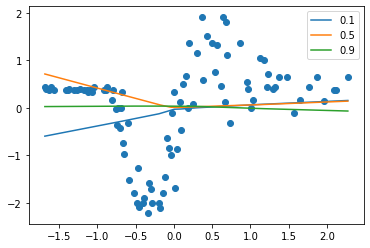

In [7]:
t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
y_test = model.predict(t_test)
plt.scatter(mcycle.times,mcycle.accel)
plt.plot(t_test, y_test[0], label='0.1')
plt.plot(t_test, y_test[1], label='0.5')
plt.plot(t_test, y_test[2], label='0.9')
plt.legend()
plt.show()